# Library

In [ ]:
import sys
sys.path.append('../../Util')
import PreProcessingUtils as ppu
import PreProcessingText as ppt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import networkx as nx
from collections import Counter, defaultdict

# Read Data

In [3]:
PATH = "../../Datasets/"

In [3]:
df = pd.read_csv(f"{PATH}RawData/posts_white_nation.csv")
df

,id,site_id,board_id,thread_id,creator,creator_id,creator_n_posts,creator_reputation,content,quoted_post_ids,...,toxicity,severe_toxicity,identity_attack,insult,profanity,threat,sexually_explicit,flirtation,toxicity_updated_on,codes
0,159330,2013,17,159330,Fred O'Malley,1.0,NaN,NaN,The Untouchable US-Saudi Relation Is A Core El...,{},...,0.322412,0.213940,0.490193,0.298979,0.141676,0.251022,0.071537,0.360325,2021-05-14 16:13:22,NaN
1,262470,2013,17,95648,Fred O'Malley,1.0,NaN,NaN,Re: A Practical Lesson in Applied Socialism - ...,{},...,0.093849,0.033070,0.123547,0.073138,0.037972,0.085475,0.047114,0.345141,2021-05-15 07:00:24,NaN
2,243978,2013,51,32056,Fred O'Malley,1.0,NaN,NaN,British Muslim Is Suing the Southern Poverty L...,{},...,0.048822,0.023169,0.056798,0.026539,0.026695,0.034211,0.066413,0.323285,2021-05-16 11:03:02,NaN
3,197219,2013,17,197219,Fred O'Malley,1.0,NaN,NaN,Source: https://www.bitchute.com/video/LJGl8Yl...,{},...,0.055014,0.021672,0.054731,0.036696,0.033163,0.102782,0.048123,0.381480,2021-05-16 01:11:38,NaN
4,197257,2013,17,197257,Fred O'Malley,1.0,NaN,NaN,Source: https://www.bitchute.com/video/neZtnXP...,{},...,0.052837,0.021702,0.052900,0.030501,0.037781,0.106653,0.062858,0.389979,2021-05-16 14:30:31,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76087,295644,2013,28443,295644,WNF News Bot,9334.0,NaN,NaN,The Turkish government has opened its borders ...,{},...,0.629967,0.488623,0.841738,0.570202,0.307006,0.720027,0.167727,0.479476,2021-10-12 13:38:52,NaN
76088,300471,2013,28443,300471,WNF News Bot,9334.0,NaN,NaN,Quote from: Aleister Adams on Today at 16:52\n...,{},...,0.662725,0.582202,0.759078,0.716396,0.693099,0.614320,0.247331,0.556477,2021-10-12 13:13:49,NaN
76089,294839,2013,28443,296733,WNF News Bot,9334.0,NaN,NaN,Quote from: Rev.Cambeul on Yesterday at 01:11\...,{},...,0.695427,0.622328,0.809321,0.766624,0.704995,0.326423,0.335918,0.523424,2021-10-12 13:11:29,NaN
76090,297862,2013,28443,296837,WNF News Bot,9334.0,NaN,NaN,"By listening to the propaganda media, I though...",{},...,0.556835,0.379990,0.780957,0.570728,0.432418,0.592867,0.151638,0.427143,2021-10-12 13:40:38,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76092 entries, 0 to 76091
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   76092 non-null  int64  
 1   site_id              76092 non-null  int64  
 2   board_id             76092 non-null  int64  
 3   thread_id            76092 non-null  int64  
 4   creator              76092 non-null  object 
 5   creator_id           76023 non-null  float64
 6   creator_n_posts      0 non-null      float64
 7   creator_reputation   0 non-null      float64
 8   content              73889 non-null  object 
 9   quoted_post_ids      76092 non-null  object 
 10  not_a_reply          76092 non-null  bool   
 11  created_on           76092 non-null  object 
 12  updated_on           76092 non-null  object 
 13  db_created_on        76092 non-null  object 
 14  db_updated_on        76092 non-null  object 
 15  toxicity             76092 non-null 

In [5]:
df.drop(columns=['id', 'site_id', 'board_id', 'thread_id', 'creator', 'creator_id', 'creator_n_posts', 'creator_reputation','quoted_post_ids', 'not_a_reply', 'db_created_on', 'db_updated_on', 'codes', 'toxicity_updated_on'], inplace=True)

In [6]:
df.describe()

,toxicity,severe_toxicity,identity_attack,insult,profanity,threat,sexually_explicit,flirtation
count,76092.000000,76092.000000,76092.000000,76092.000000,76092.000000,76092.000000,76092.000000,76092.000000
mean,0.161621,0.077481,0.152539,0.148123,0.072808,0.155020,0.062225,0.345835
std,0.269252,0.232243,0.271238,0.269235,0.235757,0.267130,0.222720,0.249945
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.073993,0.027787,0.060160,0.056688,0.024444,0.068209,0.033576,0.322273
50%,0.116702,0.050565,0.120554,0.111817,0.049987,0.115274,0.054732,0.381903
75%,0.242359,0.119754,0.222959,0.226531,0.112048,0.239596,0.097326,0.446045
max,0.992562,0.936433,0.987041,0.986810,0.987778,0.986512,0.990803,0.945055


In [7]:
df.describe(include='object')

,content,created_on,updated_on
count,73889,76092,76092
unique,71213,74111,74111
top,Re: A Practical Lesson in Applied Socialism - ...,2019-04-14 01:25:24,2019-04-14 01:25:24
freq,727,7,7


In [8]:
df.nunique()

content              71213
created_on           74111
updated_on           74111
toxicity             67882
severe_toxicity      60759
identity_attack      67731
insult               68722
profanity            66660
threat               65410
sexually_explicit    63265
flirtation           66791
dtype: int64

In [9]:
df.isnull().sum()

content              2203
created_on              0
updated_on              0
toxicity                0
severe_toxicity         0
identity_attack         0
insult                  0
profanity               0
threat                  0
sexually_explicit       0
flirtation              0
dtype: int64

In [10]:
df.duplicated().sum()

1

In [11]:
df.head()

,content,created_on,updated_on,toxicity,severe_toxicity,identity_attack,insult,profanity,threat,sexually_explicit,flirtation
0,The Untouchable US-Saudi Relation Is A Core El...,2018-11-05 01:42:07,2018-11-05 01:42:07,0.322412,0.213940,0.490193,0.298979,0.141676,0.251022,0.071537,0.360325
1,Re: A Practical Lesson in Applied Socialism - ...,2019-01-31 17:25:12,2019-01-31 17:25:12,0.093849,0.033070,0.123547,0.073138,0.037972,0.085475,0.047114,0.345141
2,British Muslim Is Suing the Southern Poverty L...,2017-08-30 17:49:21,2017-08-30 17:49:21,0.048822,0.023169,0.056798,0.026539,0.026695,0.034211,0.066413,0.323285
3,Source: https://www.bitchute.com/video/LJGl8Yl...,2019-09-03 17:57:54,2019-09-03 17:57:54,0.055014,0.021672,0.054731,0.036696,0.033163,0.102782,0.048123,0.381480
4,Source: https://www.bitchute.com/video/neZtnXP...,2019-09-04 00:10:34,2019-09-04 00:10:34,0.052837,0.021702,0.052900,0.030501,0.037781,0.106653,0.062858,0.389979


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76092 entries, 0 to 76091
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   content            73889 non-null  object 
 1   created_on         76092 non-null  object 
 2   updated_on         76092 non-null  object 
 3   toxicity           76092 non-null  float64
 4   severe_toxicity    76092 non-null  float64
 5   identity_attack    76092 non-null  float64
 6   insult             76092 non-null  float64
 7   profanity          76092 non-null  float64
 8   threat             76092 non-null  float64
 9   sexually_explicit  76092 non-null  float64
 10  flirtation         76092 non-null  float64
dtypes: float64(8), object(3)
memory usage: 6.4+ MB


In [13]:
df = df.dropna(subset=['content'])
df = df.drop_duplicates(subset=['content'], keep='first')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71213 entries, 0 to 76091
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   content            71213 non-null  object 
 1   created_on         71213 non-null  object 
 2   updated_on         71213 non-null  object 
 3   toxicity           71213 non-null  float64
 4   severe_toxicity    71213 non-null  float64
 5   identity_attack    71213 non-null  float64
 6   insult             71213 non-null  float64
 7   profanity          71213 non-null  float64
 8   threat             71213 non-null  float64
 9   sexually_explicit  71213 non-null  float64
 10  flirtation         71213 non-null  float64
dtypes: float64(8), object(3)
memory usage: 6.5+ MB


# Data Wrangling

## Created_on & updated_on

In [14]:
df.shape

(71213, 11)

In [16]:
df[(df['created_on'] == df['updated_on'])][['created_on', 'updated_on']]

,created_on,updated_on
0,2018-11-05 01:42:07,2018-11-05 01:42:07
1,2019-01-31 17:25:12,2019-01-31 17:25:12
2,2017-08-30 17:49:21,2017-08-30 17:49:21
3,2019-09-03 17:57:54,2019-09-03 17:57:54
4,2019-09-04 00:10:34,2019-09-04 00:10:34
...,...,...
76086,2013-10-20 20:35:09,2013-10-20 20:35:09
76087,2020-03-02 08:40:36,2020-03-02 08:40:36
76088,2020-10-31 22:35:54,2020-10-31 22:35:54
76089,2020-01-24 21:53:14,2020-01-24 21:53:14


In [17]:
df.drop(columns=['updated_on'], inplace=True)

In [18]:
df['created_on'].value_counts(dropna=False)

created_on
2019-04-14 01:25:24    7
2019-05-20 04:01:58    4
2020-05-05 16:24:57    3
2020-12-08 22:52:26    3
2020-06-27 16:35:35    3
                      ..
2019-10-25 18:23:19    1
2019-10-25 15:41:23    1
2018-12-12 15:31:17    1
2019-10-25 15:08:23    1
2021-01-10 16:55:14    1
Name: count, Length: 69537, dtype: int64

In [19]:
df['created_on'] = df['created_on'].apply(ppu.convert_millisecond_date)
df['created_on'] = df['created_on'].dt.strftime('%Y-%m-%d')

In [20]:
df['created_on'].value_counts(dropna=False)

created_on
2019-09-10    257
2019-05-16    251
2019-08-19    245
2019-08-28    241
2019-05-22    234
             ... 
2016-06-11      1
2016-05-29      1
2016-05-14      1
2014-07-20      1
2017-02-19      1
Name: count, Length: 1590, dtype: int64

In [21]:
df.to_csv(f"{PATH}CleanedData/posts_white_nation_cleaned.csv", index=False)

In [23]:
ppu.extract_date_features(df, 'created_on')

,content,created_on,toxicity,severe_toxicity,identity_attack,insult,profanity,threat,sexually_explicit,flirtation,created_on_year,created_on_month,created_on_day,created_on_dayofweek,created_on_is_weekend
0,The Untouchable US-Saudi Relation Is A Core El...,2018-11-05,0.322412,0.213940,0.490193,0.298979,0.141676,0.251022,0.071537,0.360325,2018,11,5,0,0
1,Re: A Practical Lesson in Applied Socialism - ...,2019-01-31,0.093849,0.033070,0.123547,0.073138,0.037972,0.085475,0.047114,0.345141,2019,1,31,3,0
2,British Muslim Is Suing the Southern Poverty L...,2017-08-30,0.048822,0.023169,0.056798,0.026539,0.026695,0.034211,0.066413,0.323285,2017,8,30,2,0
3,Source: https://www.bitchute.com/video/LJGl8Yl...,2019-09-03,0.055014,0.021672,0.054731,0.036696,0.033163,0.102782,0.048123,0.381480,2019,9,3,1,0
4,Source: https://www.bitchute.com/video/neZtnXP...,2019-09-04,0.052837,0.021702,0.052900,0.030501,0.037781,0.106653,0.062858,0.389979,2019,9,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76086,The Greatest Failure in All History; A Critica...,2013-10-20,0.046619,0.018729,0.043325,0.024767,0.056007,0.091178,0.051146,0.457979,2013,10,20,6,1
76087,The Turkish government has opened its borders ...,2020-03-02,0.629967,0.488623,0.841738,0.570202,0.307006,0.720027,0.167727,0.479476,2020,3,2,0,0
76088,Quote from: Aleister Adams on Today at 16:52\n...,2020-10-31,0.662725,0.582202,0.759078,0.716396,0.693099,0.614320,0.247331,0.556477,2020,10,31,5,1
76089,Quote from: Rev.Cambeul on Yesterday at 01:11\...,2020-01-24,0.695427,0.622328,0.809321,0.766624,0.704995,0.326423,0.335918,0.523424,2020,1,24,4,0


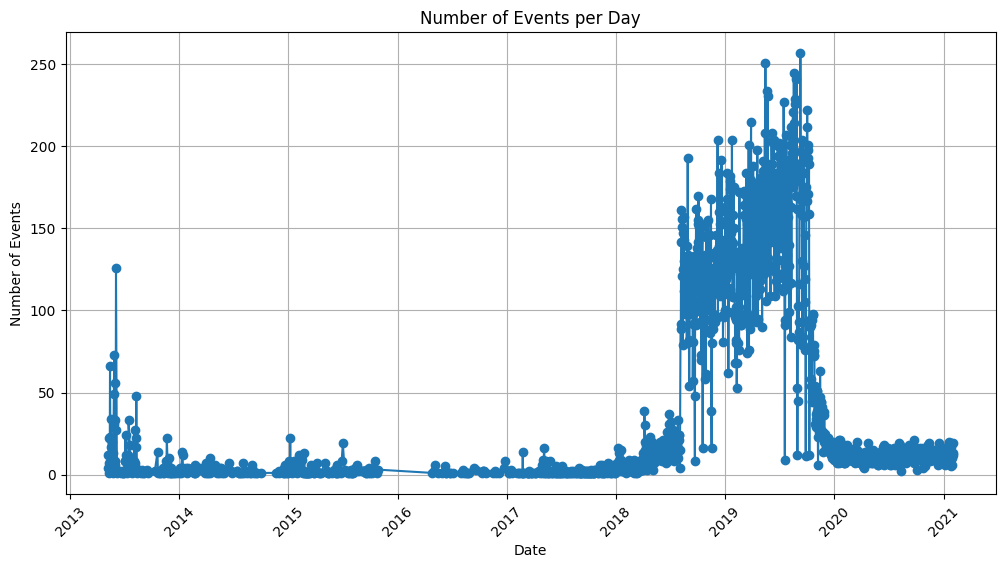

In [24]:
daily_counts = df.groupby(df['created_on'].dt.date).size()

plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-')
plt.title('Number of Events per Day')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

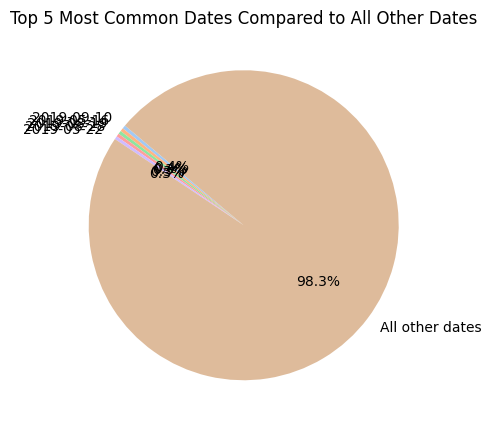

In [25]:
top_5_dates = df['created_on'].value_counts().nlargest(5)
top_5_counts = top_5_dates.values
top_5_labels = top_5_dates.index.date
other_count = len(df) - top_5_counts.sum()

labels = [f'{date}' for date in top_5_labels] + ['All other dates']
sizes = list(top_5_counts) + [other_count]
colors = sns.color_palette('pastel', len(sizes))
explode = [0.1] * len(top_5_labels) + [0]

plt.figure(figsize=(5, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Most Common Dates Compared to All Other Dates')
plt.show();

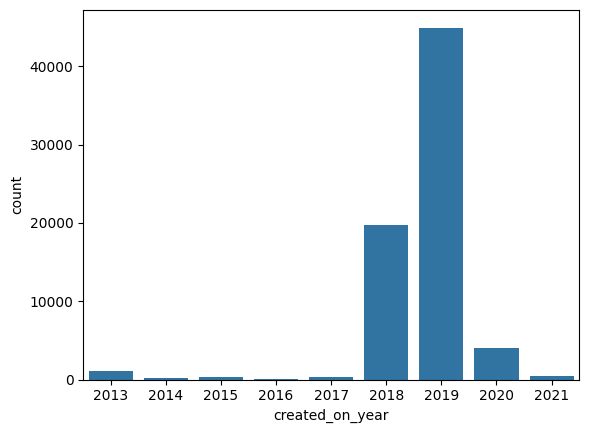

In [26]:
sns.countplot(x='created_on_year', data=df);

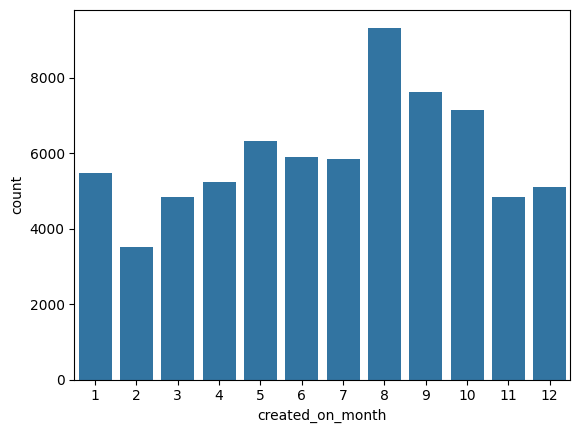

In [27]:
sns.countplot(x='created_on_month', data=df);

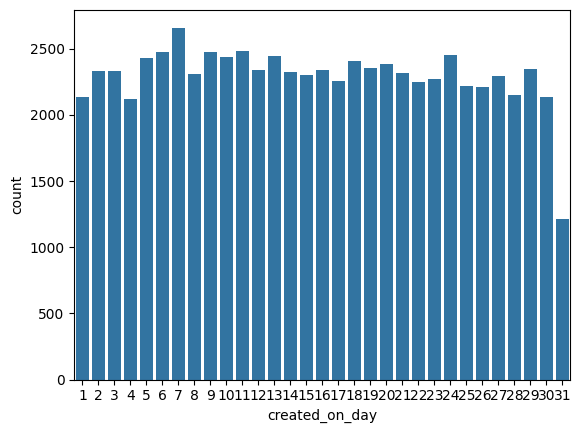

In [28]:
sns.countplot(x='created_on_day', data=df);

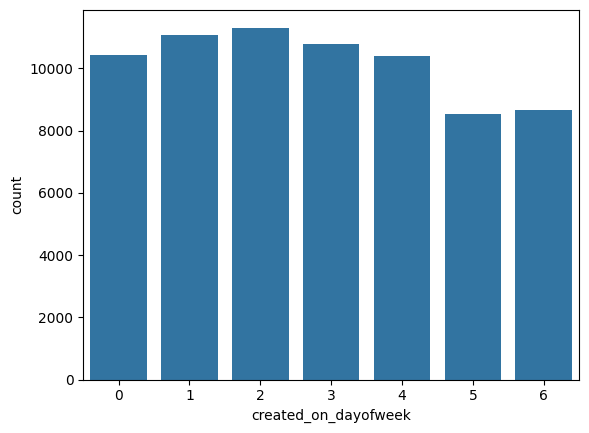

In [29]:
sns.countplot(x='created_on_dayofweek', data=df);

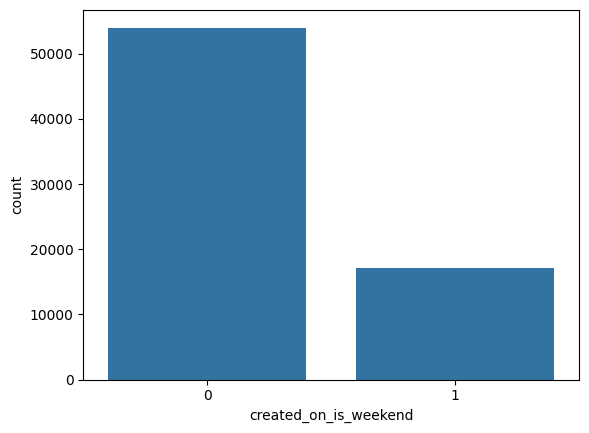

In [30]:
sns.countplot(x='created_on_is_weekend', data=df);

### Plot Figure

<Figure size 1000x500 with 0 Axes>

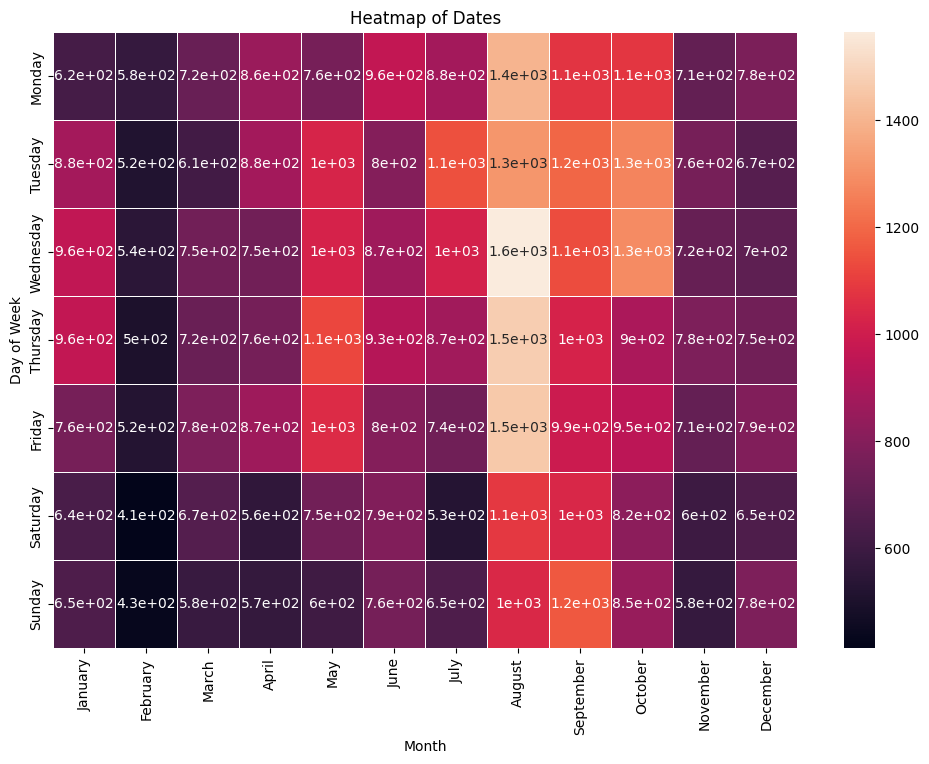

In [31]:
plt.figure(figsize=(10, 5))
heatmap_data = df.pivot_table(index='created_on_dayofweek', columns='created_on_month', aggfunc='size', fill_value=0)
heatmap_data
days_order = [0, 1, 2, 3, 4, 5, 6]
heatmap_data = heatmap_data.reindex(days_order)
months_order = list(range(1, 13))
heatmap_data = heatmap_data[months_order]

heatmap_data.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data.columns = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cbar=True, linewidth=.5)
plt.title('Heatmap of Dates')
plt.xlabel('Month')
plt.ylabel('Day of Week');

<Figure size 1000x500 with 0 Axes>

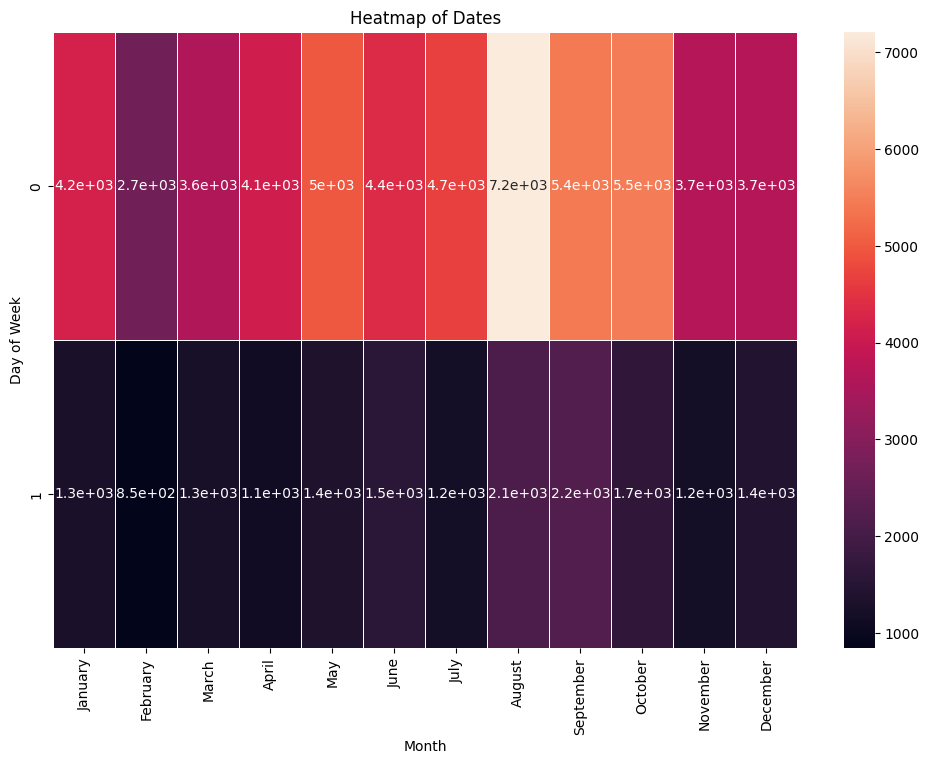

In [32]:
plt.figure(figsize=(10, 5))
heatmap_data = df.pivot_table(index='created_on_is_weekend', columns='created_on_month', aggfunc='size', fill_value=0)
heatmap_data
days_order = [0, 1]
heatmap_data = heatmap_data.reindex(days_order)
months_order = list(range(1, 13))
heatmap_data = heatmap_data[months_order]

heatmap_data.index = [0, 1]
heatmap_data.columns = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cbar=True, linewidth=.5)
plt.title('Heatmap of Dates')
plt.xlabel('Month')
plt.ylabel('Day of Week');

In [6]:
df = df[['content', 'created_on']]
df.to_csv(f"{PATH}CleanedData/posts_white_nation_cleaned_content_craeted.csv", index=False)

# Pre-process Content

In [4]:
df = pd.read_csv(f"{PATH}CleanedData/posts_white_nation_cleaned_content_created.csv")
df.head()

,content,created_on
0,The Untouchable US-Saudi Relation Is A Core El...,2018-11-05
1,Re: A Practical Lesson in Applied Socialism - ...,2019-01-31
2,British Muslim Is Suing the Southern Poverty L...,2017-08-30
3,Source: https://www.bitchute.com/video/LJGl8Yl...,2019-09-03
4,Source: https://www.bitchute.com/video/neZtnXP...,2019-09-04


In [5]:
df = ppu.preprocess_url(df, 'content')
df['content'] = df['content'].apply(ppt.remove_html_tags)
df

c:\Users\dommy\OneDrive\Documenti\GSoC - Final\GSoC\Analyze_files\SingleDatasetsAnalysis\../../Util\PreProcessingText.py:26: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


,content,created_on
0,The Untouchable US-Saudi Relation Is A Core El...,2018-11-05
1,Re: A Practical Lesson in Applied Socialism - ...,2019-01-31
2,British Muslim Is Suing the Southern Poverty L...,2017-08-30
3,Source: bitchute,2019-09-03
4,Source: bitchute,2019-09-04
...,...,...
71208,The Greatest Failure in All History; A Critica...,2013-10-20
71209,The Turkish government has opened its borders ...,2020-03-02
71210,Quote from: Aleister Adams on Today at : I'd w...,2020-10-31
71211,Quote from: Rev,2020-01-24


In [7]:
df.duplicated().sum()

16288

In [8]:
df = df.dropna(subset=['content'])
df = df.drop_duplicates(subset=['content'], keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52419 entries, 0 to 71212
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   content     52419 non-null  object
 1   created_on  52419 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [11]:
word_dict = Counter(' '.join([str(item).lower() for item in df.content.tolist()]).split())

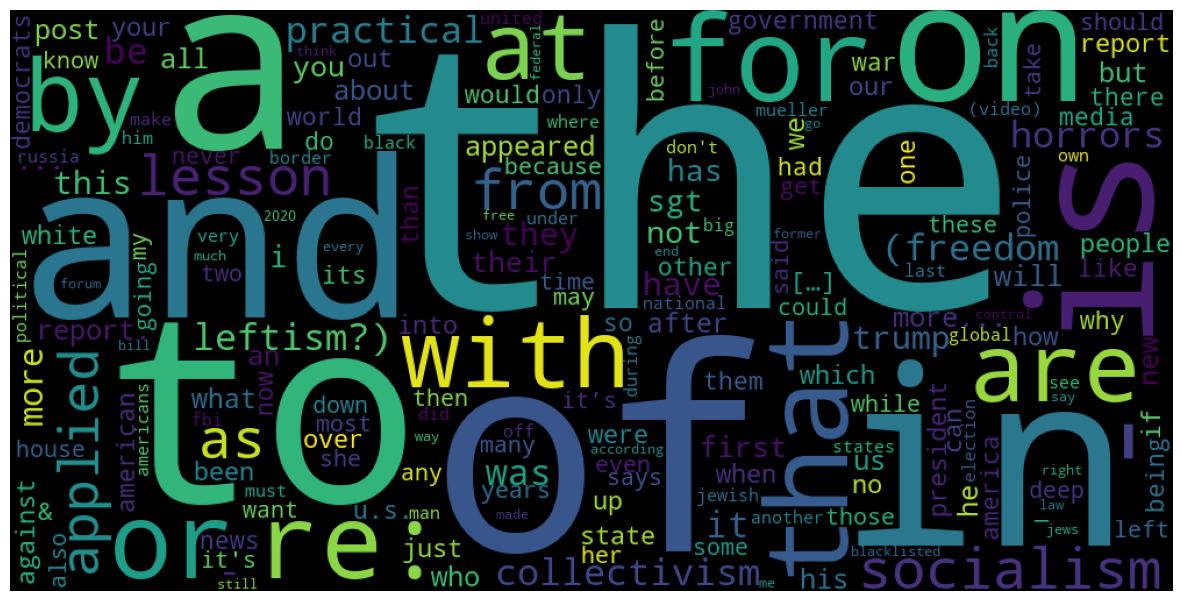

In [12]:
# Count of words in each name_thread
most_common_words = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_dict)
plt.figure(figsize=(15,8))
plt.imshow(most_common_words)
plt.axis("off");